In [ ]:
from pathlib import Path
import sys

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))
from app.assets import preprocessing

In [11]:
# Load processed data using the data loading function
data = preprocessing.load_processed_data()

df_customer = data['customer']
df_order = data['order']
df_geo = data['geo']
df_order_item = data['order_item']
df_product = data['product']
df_order_payment = data['order_payment']
df_order_review = data['order_review']
df_seller = data['seller']

In [12]:
df_order_item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,name_length,product_description_lenght,photos_qty,weight,length,height,width,category_name,volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,2400.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,42000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,53400.0
111019,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,44460.0
111020,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,9576.0
111021,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,8000.0


In [13]:

orders_merged = (df_order.merge(df_order_item, on='order_id', how='inner')
    .merge(df_order_payment, on='order_id', how='inner')
    .merge(df_order_review, on='order_id', how='left'))
numeric_cols = ['price', 'freight_value', 'delivery_time', 'review_score', 'weight', 'volume']



<Axes: >

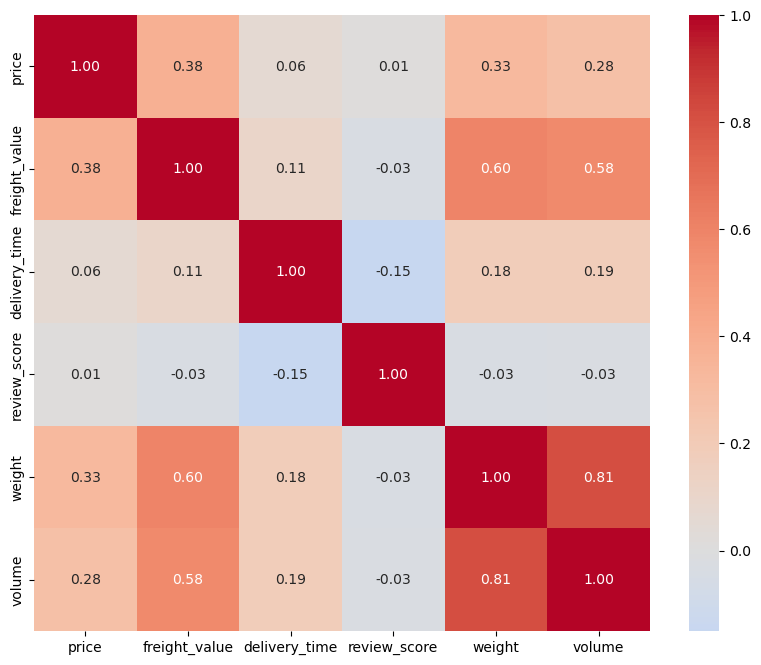

In [14]:
corr_data = orders_merged[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax, square=True)


In [15]:
def correlate(df: pd.DataFrame, x: str, y:str) -> tuple:
    mask = df[[x, y]].notnull().all(axis=1)
    x_var = df.loc[mask, x]
    y_var = df.loc[mask, y]
    r, p = stats.pearsonr(x_var,y_var)
    r, p = round(r,2), round(p,2)
    return r, p, r**2


print("---------------------Freight Value X _______---------------------------")

r, p , r_sq = correlate(orders_merged, 'freight_value', 'price')
print(f'Freight value X Price: r: {r}, p-val: {p}, r^2: {r_sq}')

r, p , r_sq = correlate(orders_merged, 'freight_value', 'weight')
print(f'Freight value X weight: r: {r}, p-val: {p}, r^2: {r_sq}')

r, p , r_sq = correlate(orders_merged, 'freight_value', 'volume')
print(f'Freight value X volume: r: {r}, p-val: {p}, r^2: {r_sq}')

print()

print("---------------------Delivery Time X _______---------------------------")

r, p , r_sq = correlate(orders_merged, 'delivery_time', 'volume')
print(f'Delivery time X volume: r: {r}, p-val: {p}, r^2: {r_sq}')

r, p , r_sq = correlate(orders_merged, 'delivery_time', 'weight')
print(f'Delivery time X weight: r: {r}, p-val: {p}, r^2: {r_sq}')

r, p , r_sq = correlate(orders_merged, 'delivery_time', 'review_score')
print(f'Delivery time X review_score: r: {r}, p-val: {p}, r^2: {r_sq}')


---------------------Freight Value X _______---------------------------
Freight value X Price: r: 0.38, p-val: 0.0, r^2: 0.1444
Freight value X weight: r: 0.6, p-val: 0.0, r^2: 0.36
Freight value X volume: r: 0.58, p-val: 0.0, r^2: 0.3364

---------------------Delivery Time X _______---------------------------
Delivery time X volume: r: 0.19, p-val: 0.0, r^2: 0.0361
Delivery time X weight: r: 0.18, p-val: 0.0, r^2: 0.0324
Delivery time X review_score: r: -0.15, p-val: 0.0, r^2: 0.0225


> **Observations:**
> - **33.6%** and **36%** of the variance in freight value can be explained by product volume and weight, respectively (**p < 0.001**). 14% of freight value variance can be attributed to price, as well. Bigger, heavier, expensive products are more expensive to ship. 
> - Delivery time is only slightly **negatively correlated** with review score (**p < 0.001**), but only 2.5% of the variance can be explained. 
> - Relationship between delivery time and product dimensions is neglegible (**< 5%**). This suggests delivery time is driven by other factors, such as **distance, logistic efficiency, or regional infrastructure**.

---

> **Next Steps**  
> - Identify which localities are purchasing higher freight value items. 
> - Recommend cost-saving measures to reduce shipping overhead.  
> - Find correlations between distance between buyer, seller, and delivery time. If a strong relationship exists, move forward with predictive modeling.
